<a href="https://colab.research.google.com/github/ianravisingh/Tensorflow-2.0/blob/main/TF2_0_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

print(tf.__version__)

2.15.0


In [2]:
# imports
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

In [3]:
# load the data
cifar10 = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')

170498071/170498071 [==============================] - 4s 0us/step
Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000,)


In [4]:
# number of classes
K = len(set(y_train))
print(f'Number of classes: {K}')
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

Number of classes: 10


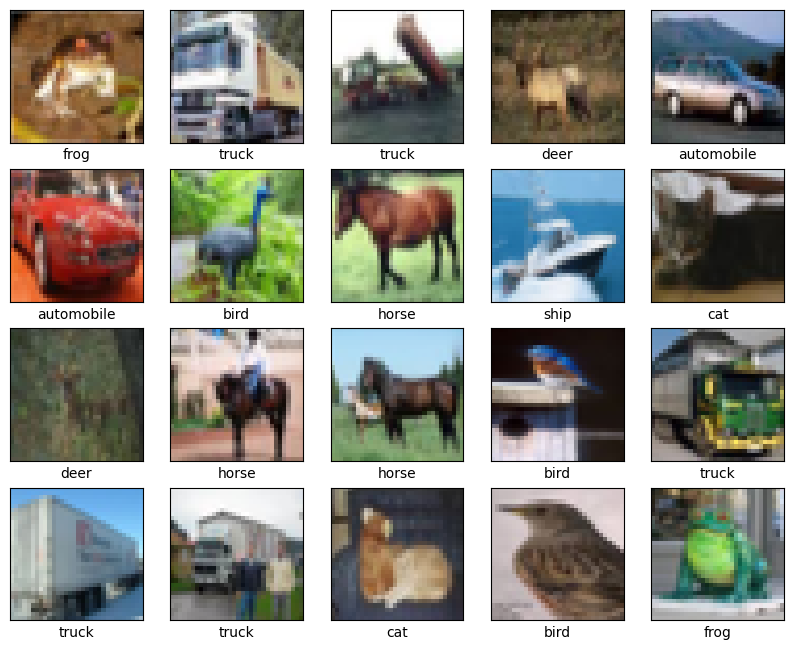

In [5]:
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i])
  plt.xlabel(class_names[y_train[i]])
  plt.xticks([])
  plt.yticks([])
plt.show()

In [6]:
# build the model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), activation='relu', input_shape=X_train[0].shape),
    Conv2D(filters=64, kernel_size=3, strides=2, activation='relu'),
    Conv2D(filters=128, kernel_size=3, strides=2, activation='relu'),
    Flatten(),
    Dropout(0.5),
    Dense(units=1024, activation='relu'),
    Dropout(0.2),
    Dense(units=K, activation='softmax')
])

In [7]:
# Compile and fit
# Note: make sure you are using the GPU for this!

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 14s 6ms/step - loss: 1.5745 - accuracy: 0.4235 - val_loss: 1.3230 - val_accuracy: 0.5179
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2875 - accuracy: 0.5363 - val_loss: 1.1439 - val_accuracy: 0.6013
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1525 - accuracy: 0.5845 - val_loss: 1.0815 - val_accuracy: 0.6148
Epoch 4/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0677 - accuracy: 0.6168 - val_loss: 0.9893 - val_accuracy: 0.6538
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9995 - accuracy: 0.6432 - val_loss: 0.9589 - val_accuracy: 0.6644
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9393 - accuracy: 0.6642 - val_loss: 0.9340 - val_accuracy: 0.6706
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8941 - accuracy: 0.6815 - val_loss: 0.8910 - val_accuracy

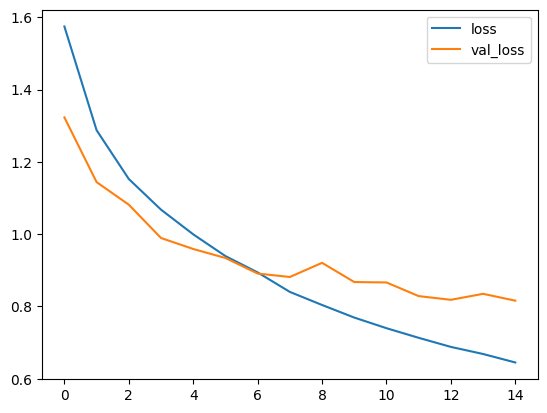

In [8]:
# plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

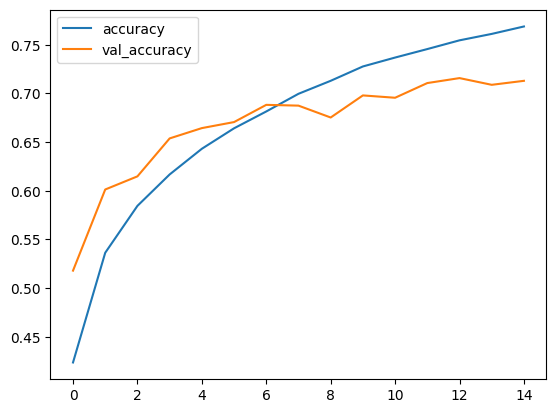

In [9]:
# plot accuracy
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [10]:
# evaluation of model
result = model.evaluate(X_test, y_test)
print('Loss: ', result[0])
print('Accuracy: ', result[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.8159 - accuracy: 0.7130
Loss:  0.8159446716308594
Accuracy:  0.7129999995231628


In [11]:
# predict the model
y_hat = model.predict(X_test).argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


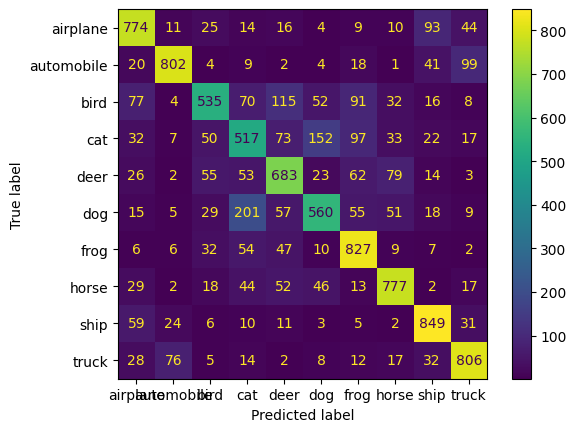

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cf = confusion_matrix(y_test, y_hat)
fig = ConfusionMatrixDisplay(cf, display_labels=class_names)
fig.plot()
plt.show()

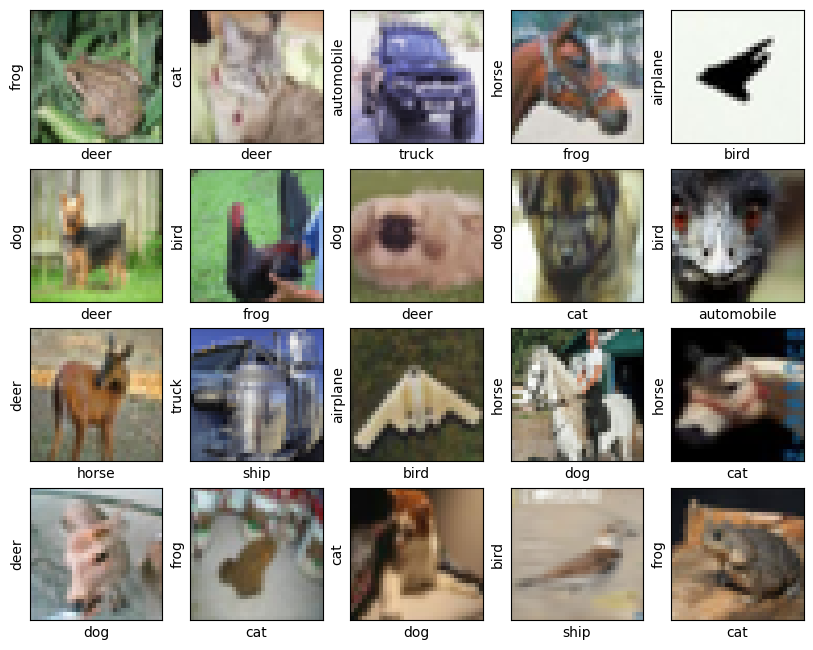

In [13]:
# display some incorrect classified images
incorrect_idx = np.where(y_test!=y_hat)[0]
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[incorrect_idx[i]])
  plt.xlabel(class_names[y_hat[incorrect_idx[i]]])
  plt.ylabel(class_names[y_test[incorrect_idx[i]]])
  plt.xticks([])
  plt.yticks([])
plt.show()